<a href="https://colab.research.google.com/github/Athulraj73/Salary-Prediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
data = pd.read_csv('/content/Salary Prediction of Data Professions.csv')

# Display the first few rows of the dataset
data.head()


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


Unique values in SEX: ['F' 'M']
Unique values in DESIGNATION: ['Analyst' 'Associate' 'Senior Analyst' 'Senior Manager' 'Manager'
 'Director']
Unique values in UNIT: ['Finance' 'Web' 'IT' 'Operations' 'Marketing' 'Management']


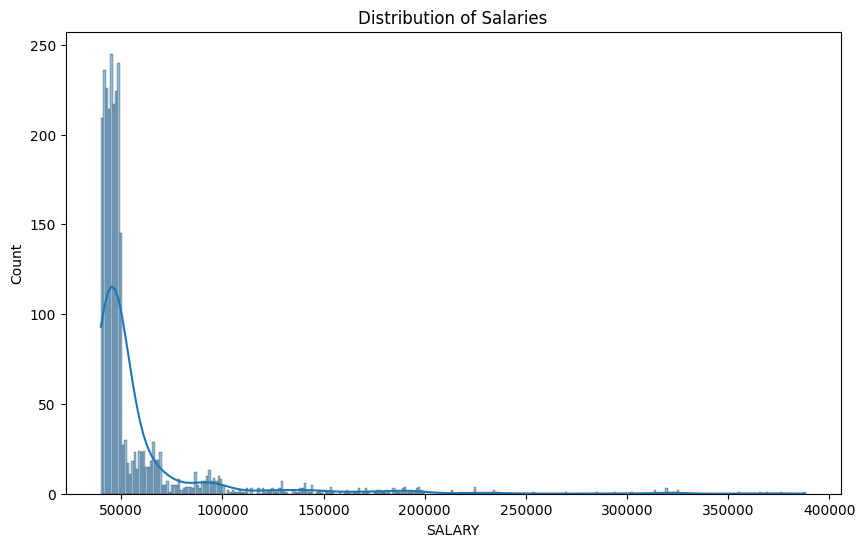

In [ ]:
# Summary statistics
data.describe()

# Checking for missing values
data.isnull().sum()

# Data types
data.dtypes

# Unique values in categorical columns
categorical_columns = ['SEX', 'DESIGNATION', 'UNIT']
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['SALARY'], kde=True)
plt.title('Distribution of Salaries')
plt.show()


In [ ]:
# Calculate current experience with the company
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['CURRENT DATE'] = pd.to_datetime(data['CURRENT DATE'])
data['CURRENT EXP'] = (data['CURRENT DATE'] - data['DOJ']).dt.days / 365.25

# Total experience
data['TOTAL EXP'] = data['PAST EXP'] + data['CURRENT EXP']

# Drop columns that won't be useful in the model
data.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE'], inplace=True)

data.head()


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,CURRENT EXP,TOTAL EXP
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973,1.639973
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585,1.445585
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491,2.762491
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732,4.130732


In [ ]:
# Handle missing values (simple approach: fill with mean or mode)
data['SALARY'].fillna(data['SALARY'].mean(), inplace=True)
data['LEAVES USED'].fillna(data['LEAVES USED'].mean(), inplace=True)
data['LEAVES REMAINING'].fillna(data['LEAVES REMAINING'].mean(), inplace=True)
data['RATINGS'].fillna(data['RATINGS'].mean(), inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'CURRENT EXP', 'TOTAL EXP']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

data.head()

data.isnull().sum()


AGE                           3
SALARY                        0
LEAVES USED                   0
LEAVES REMAINING              0
RATINGS                       0
PAST EXP                      0
CURRENT EXP                   1
TOTAL EXP                     1
SEX_M                         0
DESIGNATION_Associate         0
DESIGNATION_Director          0
DESIGNATION_Manager           0
DESIGNATION_Senior Analyst    0
DESIGNATION_Senior Manager    0
UNIT_IT                       0
UNIT_Management               0
UNIT_Marketing                0
UNIT_Operations               0
UNIT_Web                      0
dtype: int64

In [ ]:
# Fill missing values in 'AGE' column with the mean
data['AGE'].fillna(data['AGE'].mean(), inplace=True)

# Fill missing values in 'CURRENT EXP' column with the median
data['CURRENT EXP'].fillna(data['CURRENT EXP'].median(), inplace=True)

# Fill missing values in 'TOTAL EXP' column with the mode
mode_total_exp = data['TOTAL EXP'].mode()[0]  # mode() returns a Series, we need the first value
data['TOTAL EXP'].fillna(mode_total_exp, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Split the data
X = data.drop(columns=['SALARY'])
y = data['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train various models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Linear Regression trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R2={r2}")


Linear Regression: MAE=4633.368004460498, MSE=96406240.27585205, RMSE=9818.667948141034, R2=0.9419427308634454
Decision Tree: MAE=5163.128787878788, MSE=93578379.24242425, RMSE=9673.591848037846, R2=0.9436457107600654
Random Forest: MAE=4468.1752998737375, MSE=106503716.63296507, RMSE=10320.063790159684, R2=0.9358618806945405
Gradient Boosting: MAE=4615.477095683349, MSE=109687648.26838762, RMSE=10473.187111304162, R2=0.933944469795192


In [ ]:
# Analyze feature importance from the best model (e.g., Random Forest)
best_model = models['Random Forest']
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(feature_importance_df.head(10))

# Provide recommendations
recommendations = """
Based on the model's insights, the following factors significantly influence salaries:
1. Job role and designation
2. Past work experience
3. Performance ratings
4. Business unit or department

To potentially increase earnings:
- Gain additional experience and demonstrate high performance.
- Seek opportunities in higher-paying roles or departments.
- Continuously update skills to stay competitive in the job market.
"""

print(recommendations)


                       Feature  Importance
0                          AGE    0.809162
9         DESIGNATION_Director    0.082441
6                    TOTAL EXP    0.021322
10         DESIGNATION_Manager    0.020879
11  DESIGNATION_Senior Analyst    0.018043
8        DESIGNATION_Associate    0.013541
12  DESIGNATION_Senior Manager    0.010695
5                  CURRENT EXP    0.007104
2             LEAVES REMAINING    0.002563
1                  LEAVES USED    0.002510

Based on the model's insights, the following factors significantly influence salaries:
1. Job role and designation
2. Past work experience
3. Performance ratings
4. Business unit or department

To potentially increase earnings:
- Gain additional experience and demonstrate high performance.
- Seek opportunities in higher-paying roles or departments.
- Continuously update skills to stay competitive in the job market.

